# Tema 2. Algoritmos de Búsqueda Local

### En esta clase ejercitaremos los conocimientos relacionados con los algoritmos de búsqueda local y sus extensiones.

In [1]:
# Comenzamos importando las librerías de python que serán utilizadas para desarrollar los ejercicios,
# lecturas de ficheros, imágenes, etcétera.
#import pandas as pd 
%matplotlib inline


import numpy as np
import pylab as pl
import matplotlib.cm as cm
import matplotlib
#import pandas as pd 
import random
import math
from PIL import Image as im
#import cv2

from IPython.display import display
from IPython.display import Image

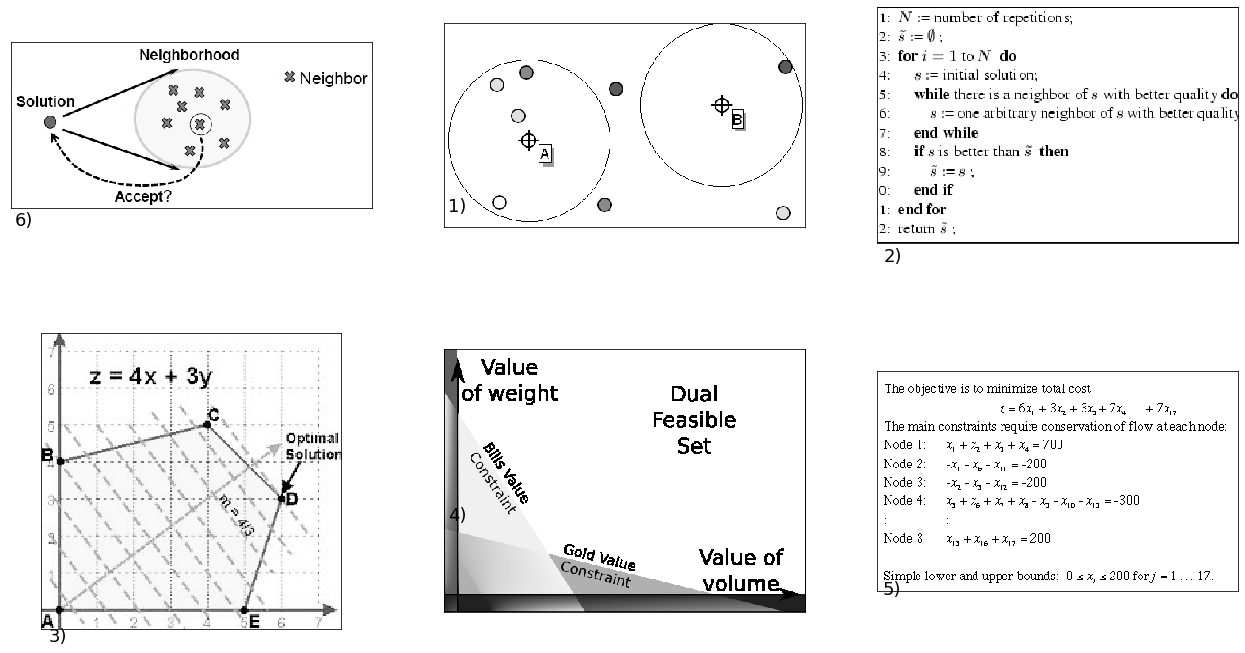

In [2]:
# Importamos varias imágenes representando diferentes de varios métodos de optimización

matplotlib.rcParams['figure.figsize'] = (22,12)
f = pl.figure()
the_algorithms = ['Programación entera', 'Programación 0-1', 'Programación cuadrática', 'Programación lineal', 'Programación no lineal','Programación 0-1']
for n, fname in enumerate(('images/ls1.jpg', 'images/ls2.gif','images/ls3.png','images/ls4.jpeg','images/ls5.png','images/ls6.gif')):
    image=im.open(fname).convert("L")    
    arr=np.asarray(image)
    f.add_subplot(2, 3, n+1)  # this line outputs images side-by-side    
    fig=pl.imshow(arr,cmap=cm.Greys_r)
    ttitle = str(np.mod(n+5,6)+1)+')'
    pl.text(5,232,ttitle,size=18)    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False) 
    
    

In [3]:
# A partir del análisis de las imágenes anteriores
# Seleccione cuáles describen conceptos relacionados con la búsqueda local 

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta


%run ConceptosBusquedaLocal.py 1 2 6

Todas las respuestas escogidas son correctas y no falta ninguna.


<Figure size 1584x864 with 0 Axes>

In [4]:
# A continuación se presentan las funciones TwoOpt, Swap, Complement y Decrease
# que implementan diferentes tipos de vecidandes para representaciones basadas en
# permutaciones. 
# Observe el resultado de la aplicación de los diferentes operadores de vecindad


# TwoOpt crea una vecindad basda en el operador two-opt de forma determinista
# Todas las permutaciones que se pueden obtener con two-opt están en la vecindad
def TwoOpt(perm):
    n = perm.shape[0]
    n_neighbors = int(n*(n-1)/2 - n)  # Número de vecinos    
    neighbors = np.zeros((n_neighbors,n),dtype=int) # Guardaremos todos los vecinos en neighbors
    ind = 0
    for i in range(n-1):
      for j in range(i+2,n):        # Las posiciones a elegir para el two-opt no deben ser consecutivas
        if not(i==0 and j==n-1):    # Las posiciones no deben ser primera y última (son circularmente consecutivas)
          neighbors[ind,:] = perm    
          aux = perm[i:j+1].copy() 
          neighbors[ind,i:j+1] = aux[::-1]   # Se invierte el camino entre posiciones elegidas
          ind = ind + 1   
    return neighbors

# Swap crea una vecindad basada en el operador de intercambio entre posiciones
# Todas las permutaciones que se pueden obtener como un swap entre la primera posición
# y cualquiera de las restantes están en la vecindad

def Swap(perm):
    n = perm.shape[0]
    n_neighbors = n-1           # Número de vecinos
    neighbors = np.zeros((n_neighbors,n),dtype=int) # Guardaremos todos los vecinos en neighbors 
    ind = 0
    for i in range(1,n):
          neighbors[ind,:] = perm    
          neighbors[ind,i] = perm[0]
          neighbors[ind,0] = perm[i]  
          ind = ind + 1   
    return neighbors

# Complement crea una vecindad basada en el operador de complemento entre posiciones
# en la cual cada valor i en la permutación es sustituido por el valor (n-i) excepto para i=n,
# que permanece igual
# Cada permutación tiene un único vecino


def Complement(perm):
    n = perm.shape[0]
    n_neighbors = 1                       # Número de vecinos
    neighbors = np.zeros((n_neighbors,n),dtype=int) # Guardaremos todos los vecinos en neighbors 
    pos_n = np.where(perm==n)
    neighbors[0,:] = (n-perm)             # Se sustituye por el complemento     
    neighbors[0,pos_n] = n                # Se mantiene el valor de n igual
    return neighbors

# Decrease crea una vecindad basada en obtener una nueva solución restando un valor "v" a cada posición
# y crear una solución vecina por cada valor de v en (1,...,n-1). Cuando la resta da valor cero, se pasa
# a n
# Ej: permutacion original:   5 3 4 2 1:
#     permutaciones vecinas:  (4 2 3 1 5),(3,1,2,5,4),(2,5,1,4,3),(1,4,5,3,2)
                             

def Decrease(perm):
    n = perm.shape[0]
    n_neighbors = n-1                       # Número de vecinos    
    neighbors = np.zeros((n_neighbors,n),dtype=int) # Guardaremos todos los vecinos en neighbors 
    auxperm = perm.copy()
    for i in range(n-1):
      auxperm = auxperm-1
      pos_0 = np.where(auxperm==0)
      auxperm[pos_0] = n  
      neighbors[i,:] = auxperm                                
    return neighbors


n = 6;
perm = np.random.permutation(n)+1
print(perm)
neighbors = TwoOpt(perm)
#neighbors = Swap(perm)
#neighbors = Complement(perm)
#neighbors = Decrease(perm)
print(neighbors)    

[4 2 5 6 1 3]
[[5 2 4 6 1 3]
 [6 5 2 4 1 3]
 [1 6 5 2 4 3]
 [4 6 5 2 1 3]
 [4 1 6 5 2 3]
 [4 3 1 6 5 2]
 [4 2 1 6 5 3]
 [4 2 3 1 6 5]
 [4 2 5 3 1 6]]


In [5]:
# A partir del análisis de los algoritmos anteriores 
# Seleccione cuáles de los operadores de vecindad anteriores pueden utilizarse
# de forma efectiva como parte de una búsqueda local 

# 1) TwoOpt
# 2) Swap
# 3) Complement
# 4) Decrease

%run OperadoresLocales.py  1 2

Todas las respuestas escogidas son correctas y no falta ninguna.


In [6]:
# Utilizaremos el problema del agente viajero para probar algoritmos
# de búsqueda local basados en diferentes tipos de vecindades
# La siguiente función lee una matriz de distancias entre ciudades 
# para la instancia del problema TSP '../Instances/TSP/Cebe.tsp.n10.1'

def Read_Instance(fname):
 hdl = open(fname, 'r')
 mylist = hdl.readlines()
 hdl.close()
 n = eval(mylist[0])
 distances  = np.zeros((n,n))
 for i in range(n):
   for j,val in enumerate(mylist[i+1].split()):     
     distances[i,j]=eval(val)
         
 return distances
                
TSP_Matrix =  Read_Instance('../Instances/TSP/Cebe.tsp.n10.1')
print(TSP_Matrix)

[[ 0.  3. 23. 33. 16. 18. 11. 31. 19. 42.]
 [ 3.  0. 29. 30. 31. 51. 23. 48. 31. 24.]
 [23. 29.  0. 38. 21. 41. 62. 10. 24.  7.]
 [33. 30. 38.  0. 45. 21. 32. 34.  6. 36.]
 [16. 31. 21. 45.  0. 19. 20. 20. 30. 34.]
 [18. 51. 41. 21. 19.  0. 29. 25. 40. 31.]
 [11. 23. 62. 32. 20. 29.  0. 14. 32. 45.]
 [31. 48. 10. 34. 20. 25. 14.  0. 35. 14.]
 [19. 31. 24.  6. 30. 40. 32. 35.  0. 36.]
 [42. 24.  7. 36. 34. 31. 45. 14. 36.  0.]]


In [7]:
# A partir de la matriz de distancias y definimos la función Eval_TSP_instance, 
# y la utilizamos para evaluar una solución generada aleatoriamente

def Eval_TSP_instance(Dist_Matrix,perm):
 n = Dist_Matrix.shape[0]   
 perm = np.asarray(perm) - 1                           # La representación en python comienza en cero
 print(perm)
 val_tsp = Dist_Matrix[perm[0],perm[n-1]]  # Distancia entre la primera y última ciudad
 for i in range(n-1):
   val_tsp = val_tsp + Dist_Matrix[perm[i],perm[i+1]]     # Distancia entre ciudades consecutivas   
 return val_tsp       
    
n = 10;
tsp = np.random.permutation(n)+1   
print(tsp)
evaluacion = Eval_TSP_instance(TSP_Matrix,tsp)
print("El valor de f(x) es: ",evaluacion)
    

[ 4  6  3  1  2  7  5 10  9  8]
[3 5 2 0 1 6 4 9 8 7]
El valor de f(x) es:  270.0


In [8]:
#  El programa Local_Search_TwoOpt utiliza el operador de vecindad TwoOpt para implementar 
# una búsqueda local en la cual se escoge la mejor solución de la vecindad si tiene un 
# coste menor a la mejor solución obtenida hasta el momento
# Ejecute varias veces el programa y observe la variabilidad en las soluciones finales

def Local_Search_TwoOpt(Dist_Matrix):    
 n = Dist_Matrix.shape[1]   
 init_sol = np.random.permutation(n)+1
 best_val = Eval_TSP_instance(Dist_Matrix,init_sol)              # Mejor valor
 best_sol = init_sol                                             # Mejor solución 
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = TwoOpt(best_sol)       # Todos los vecinos
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]  
      fval =  Eval_TSP_instance(Dist_Matrix,sol)    # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)
 return best_val, best_sol, number_evaluations       
        
        
best_val, best_sol, number_evaluations= Local_Search_TwoOpt(TSP_Matrix)            


[7 9 6 8 2 5 0 3 1 4]
[6 9 7 8 2 5 0 3 1 4]
[8 6 9 7 2 5 0 3 1 4]
[2 8 6 9 7 5 0 3 1 4]
[5 2 8 6 9 7 0 3 1 4]
[0 5 2 8 6 9 7 3 1 4]
[3 0 5 2 8 6 9 7 1 4]
[1 3 0 5 2 8 6 9 7 4]
[7 8 6 9 2 5 0 3 1 4]
[7 2 8 6 9 5 0 3 1 4]
[7 5 2 8 6 9 0 3 1 4]
[7 0 5 2 8 6 9 3 1 4]
[7 3 0 5 2 8 6 9 1 4]
[7 1 3 0 5 2 8 6 9 4]
[7 4 1 3 0 5 2 8 6 9]
[7 9 2 8 6 5 0 3 1 4]
[7 9 5 2 8 6 0 3 1 4]
[7 9 0 5 2 8 6 3 1 4]
[7 9 3 0 5 2 8 6 1 4]
[7 9 1 3 0 5 2 8 6 4]
[7 9 4 1 3 0 5 2 8 6]
[7 9 6 5 2 8 0 3 1 4]
[7 9 6 0 5 2 8 3 1 4]
[7 9 6 3 0 5 2 8 1 4]
[7 9 6 1 3 0 5 2 8 4]
[7 9 6 4 1 3 0 5 2 8]
[7 9 6 8 0 5 2 3 1 4]
[7 9 6 8 3 0 5 2 1 4]
[7 9 6 8 1 3 0 5 2 4]
[7 9 6 8 4 1 3 0 5 2]
[7 9 6 8 2 3 0 5 1 4]
[7 9 6 8 2 1 3 0 5 4]
[7 9 6 8 2 4 1 3 0 5]
[7 9 6 8 2 5 1 3 0 4]
[7 9 6 8 2 5 4 1 3 0]
[7 9 6 8 2 5 0 4 1 3]
238.0 [ 8 10  3  9  7  6  1  4  2  5] 36
[2 9 7 8 6 5 0 3 1 4]
[8 2 9 7 6 5 0 3 1 4]
[6 8 2 9 7 5 0 3 1 4]
[5 6 8 2 9 7 0 3 1 4]
[0 5 6 8 2 9 7 3 1 4]
[3 0 5 6 8 2 9 7 1 4]
[1 3 0 5 6 8 2 9 7 4]
[7 8 2 9 6 5 

In [9]:
# A partir del ejemplo anterior y el operador de vecindad Swap presentado
# anteriormente, modifique la siguiente función para implementar una búsqueda
# local basada en el swap para el problema de la planificación (scheduling)

def Read_Scheduling_Instance(fname):   
 hdl = open(fname, 'r')
 mylist = hdl.readlines()
 hdl.close()
 n_jobs = eval(mylist[1].split()[0])
 n_machines = eval(mylist[1].split()[1])
 processingtimes = np.zeros((n_jobs,n_machines))        
 for i in range(n_jobs):
   for j,val in enumerate(mylist[i+3].split()):   
       processingtimes[i,j] = eval(val)                     
 return n_jobs,n_machines,processingtimes
        
def Eval_Scheduling_instance(processingtimes,solution):
 n_jobs = processingtimes.shape[0]         # Número de trabajos
 n_machines = processingtimes.shape[1]     # Número de maquinas 
 timeTable = np.zeros((1,n_machines));
 prev_machine=0;
 first_pos =solution[0];
 j = range(n_machines)
 timeTable = np.cumsum(processingtimes[j,first_pos]);
 # Calcula el tiempo total de terminación de los trabajos
 fval = timeTable[n_machines-1];
 for z in range(1,n_jobs):
    job = solution[z]-1    
    timeTable[0] = timeTable[0] + processingtimes[0,job]
    prev_machine = timeTable[0]
    for machine in range(1,n_machines):
        timeTable[machine] = np.max([prev_machine,timeTable[machine]]) + processingtimes[machine,job]
        prev_machine = timeTable[machine]
        fval = fval + timeTable[machine-1]
 return fval
     

def Local_Search_Swap_PFSP(processingtimes):    
 n = processingtimes.shape[0]  
 init_sol = np.random.permutation(n)+1 
 best_val = Eval_Scheduling_instance(processingtimes,init_sol-1)   # Mejor valor
 best_sol = init_sol                                             # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = Swap(best_sol)            # Todos los vecinos
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_Scheduling_instance(processingtimes,sol-1)   # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)  
 return best_val, best_sol, number_evaluations       
        

n_jobs,n_machines,processingtimes = Read_Scheduling_Instance('../Instances/PFSP/Cebe.pfsp.n10.m10.1')  
best_val, best_sol, number_evaluations= Local_Search_Swap_PFSP(processingtimes)   

48236.0 [ 2  1 10  3  6  8  5  4  7  9] 10
46494.0 [10  1  2  3  6  8  5  4  7  9] 19


In [10]:
# Utilizando la función Local_Search_TwoOpt_PFSP_FirstFound, cree una función que en lugar de explorar
# todos los vecinos de la vecindad seleccione el vecino que primero mejore el valor de la función

def Local_Search_TwoOpt_PFSP_FirstFound(processingtimes):    
 n = processingtimes.shape[0]  
 init_sol = np.random.permutation(n)+1 
 best_val = Eval_Scheduling_instance(processingtimes,init_sol-1)   # Mejor valor
 best_sol = init_sol                                             # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = TwoOpt(best_sol)            # Todos los vecinos
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_Scheduling_instance(processingtimes,sol-1)   # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
        break
        
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)  
 return best_val, best_sol, number_evaluations       
        

n_jobs,n_machines,processingtimes = Read_Scheduling_Instance('../Instances/PFSP/Cebe.pfsp.n10.m10.1')   
     
best_val, best_sol, number_evaluations= Local_Search_TwoOpt_PFSP_FirstFound(processingtimes)   

44513.0 [10  3  2  4  9  8  6  7  1  5] 36
43462.0 [10  3  9  4  2  8  6  7  1  5] 71
42893.0 [10  3  9  4  1  7  6  8  2  5] 106
42686.0 [10  3  1  4  9  7  6  8  2  5] 141
42660.0 [10  3  1  4  5  2  8  6  7  9] 176
41642.0 [10  3  1  4  5  9  7  6  8  2] 211
41468.0 [10  3  1  4  5  9  2  8  6  7] 246
40911.0 [10  3  1  4  5  9  2  7  6  8] 281


In [11]:
# Calcular todos los puntos que pertenecen a una vecindad no es un método
# factible cuando el tamaño de la vecindad es excesivamente grande o cuando
# se desean aplicar estrategias de elección de vecinos aleatorias.
# La función RandomTwoOpt genera un vecino aleatorio utilizando el operador TwoOpt
# Utilice la función RandomTwoOpt para modificar la función y obtener un algoritmo
# de búsqueda local que genere k soluciones aleatorias de la vecindad en lugar de
# la vecindad completa

def RandomTwoOpt(perm):
    n = perm.shape[0]
    i = random.randrange(n+1)
    j = random.randrange(n+1)   
    while ( (abs(i-j)<=2) or (i==0 and j==n) or (i==n and j==0)):
        j =  random.randrange(n+1)       
    if j<i:
        i,j = j,i          
    neigh_perm = perm.copy()        
    aux = perm[i:j].copy() 
    neigh_perm[i:j] = aux[::-1]   # Se invierte el camino entre posiciones elegidas    
        
    return neigh_perm


def RandomKOpt(perm,k):
    n = perm.shape[0]
    neigh_perm = np.zeros((k,n),dtype=int)
    ind = 0
    while ( ind <=k-1 ):
        i = random.randrange(n+1)
        j = random.randrange(n+1)   
        while ( (abs(i-j)<=2) or (i==0 and j==n) or (i==n and j==0)):
            j =  random.randrange(n+1)       
        if j<i:
            i,j = j,i               
        neigh_perm[ind,:] = perm.copy()        
        aux = perm[i:j].copy() 
        flag = True
        for ix in range(neigh_perm.shape[0]):
            if ( neigh_perm[ix,:] == aux[::-1] ):
                flag = False
        if ( flag ):
            neigh_perm[ind,i:j] = aux[::-1]   # Se invierte el camino entre posiciones elegidas  
            ind = ind+1
        
    return neigh_perm


def Random_Local_Search_TwoOpt(Dist_Matrix,k):    
 n = Dist_Matrix.shape[1]   
 init_sol = np.random.permutation(n)+1 
 best_val = Eval_TSP_instance(Dist_Matrix,init_sol)              # Mejor valor
 best_sol = init_sol                                             # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                            # Mientras se mejore el valor de la función
    neighbors = RandomKOpt(best_sol,k)               # MODIFICAR
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_TSP_instance(Dist_Matrix,sol)    # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)  
 return best_val, best_sol, number_evaluations    


tsp = np.random.permutation(n)+1   
#print(tsp)
new_tsp = RandomTwoOpt(tsp)
#print(new_tsp)
solution = Random_Local_Search_TwoOpt(TSP_Matrix,30)
#print( RandomKOpt(new_tsp,2) )

[4 2 0 5 1 3 8 9 6 7]
[5 0 2 4 1 3 8 9 6 7]
[4 2 0 5 1 3 6 9 8 7]
[9 8 3 1 5 0 2 4 6 7]
[0 2 4 5 1 3 8 9 6 7]
[4 2 0 5 1 9 8 3 6 7]
[1 5 0 2 4 3 8 9 6 7]
[4 2 0 5 1 3 6 9 8 7]
[4 9 8 3 1 5 0 2 6 7]
[3 1 5 0 2 4 8 9 6 7]
[4 9 8 3 1 5 0 2 6 7]
[4 2 3 1 5 0 8 9 6 7]
[4 3 1 5 0 2 8 9 6 7]
[4 6 9 8 3 1 5 0 2 7]
[4 7 6 9 8 3 1 5 0 2]
[4 2 6 9 8 3 1 5 0 7]
[4 2 0 5 6 9 8 3 1 7]
[4 2 0 5 1 9 8 3 6 7]
[3 1 5 0 2 4 8 9 6 7]
[0 2 4 5 1 3 8 9 6 7]
[4 2 0 5 6 9 8 3 1 7]
[0 2 4 5 1 3 8 9 6 7]
[4 2 0 5 1 7 6 9 8 3]
[4 2 0 8 3 1 5 9 6 7]
[4 2 0 6 9 8 3 1 5 7]
[4 2 7 6 9 8 3 1 5 0]
[4 2 0 9 8 3 1 5 6 7]
[4 9 8 3 1 5 0 2 6 7]
[4 2 6 9 8 3 1 5 0 7]
[4 2 1 5 0 3 8 9 6 7]
[9 8 3 1 5 0 2 4 6 7]
233.0 [10  9  4  2  6  1  3  5  7  8] 31
[3 8 9 1 5 0 2 4 6 7]
[9 4 2 0 5 1 3 8 6 7]
[9 8 3 1 2 0 5 4 6 7]
[9 8 6 4 2 0 5 1 3 7]
[9 8 4 2 0 5 1 3 6 7]
[9 8 0 5 1 3 2 4 6 7]
[9 8 3 4 2 0 5 1 6 7]
[9 8 0 5 1 3 2 4 6 7]
[9 8 0 5 1 3 2 4 6 7]
[9 8 3 1 4 2 0 5 6 7]
[9 7 6 4 2 0 5 1 3 8]
[2 0 5 1 3 8 9 4 6 7]
[9 5 1 3 8 0 

/Users/froux/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [12]:
# A continuación analizamos el uso de algoritmos de búsqueda local para
# el problema de la mochila
# Ejecute las funciones

# La función Read_Knapsack_Instance permite leer instancias del problema de la mochila
# En este ejemplo leemos una instancia con n=10 objetos obtenida del repositorio 
# http://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html
# La función Eval_Knapsack_instance permite determinar si una solución al problema
# de la mochila es factible, así como determinar cuál es el valor total y el peso de los objetos
# Ejecute el script para cargar las funciones 

def Read_Knapsack_Instance(fname):  
  capacity = np.loadtxt(fname+'_c.txt',delimiter=',',unpack=True)   # Capacidad de la mochila
  weights  = np.loadtxt(fname+'_w.txt',delimiter=',',unpack=True)   # Peso de los objetos
  profits  = np.loadtxt(fname+'_p.txt',delimiter=',',unpack=True)   # Valores de los objetos
  best = np.loadtxt(fname+'_s.txt',delimiter=',',unpack=True)       # Optimal solucion    
  return capacity,weights,profits,best


def Eval_Knapsack_instance(capacity,weights,profits,solution):
 n = weights.shape[0]         # Número de objetos
 fval = 0                     # Valor  total de los objetos
 fweight = 0                  # Peso total de los objetos
 for i in range(n):    
   fval = fval + profits[i]*solution[i]     
   fweight = fweight+weights[i]*solution[i]
 feasible = (fweight<=capacity)  # Es una solución factible?      
 return feasible,fval,fweight
   
capacity,weights,profits,best = Read_Knapsack_Instance('../Instances/KNAPSACK/p01')
print('capacity: ', capacity)
print('weights: ', weights)
print('profits: ', profits) 

mysolution = [1,1,1,0,0,0,1,1,0,0,1]    
feasible,fval,fweight=Eval_Knapsack_instance(capacity,weights,profits,mysolution)
print(feasible,fval,fweight)



capacity:  165.0
weights:  [23. 31. 29. 44. 53. 38. 63. 85. 89. 82.]
profits:  [92. 57. 49. 68. 60. 43. 67. 84. 87. 72.]
False 349.0 231.0


In [13]:
# Las funciones AddObjectNeighborhood y SwapObjectsNeighborhood  implementan
# dos sistemas de vecinos para representación binaria que pueden ser utilizados 
# en el problema de la mochila
# AddObjectNeighborhood genera todas las soluciones de una dada a partir de introducir
# un nuevo objeto
# SwapObjectsNeighborhood crea todas las soluciones a partir de introducir un nuevo objeto
# y eliminar otro
# Ejecute el script utilizando los dos diferentes sistemas de vecinos

def AddObjectNeighborhood(sol):
    n = sol.shape[0]    
    n_neighbors = n-np.sum(sol)           # Número de vecinos (Todos los objetos que pueden ser añadidos)
    neighbors = np.zeros((n_neighbors,n)) # Guardaremos todos los vecinos en neighbors
    absent_objects = np.where(sol==0)[0]     # Posiciones donde se puede añadir un objeto 
    for i in range(n_neighbors):      
       neighbors[i,:] = sol.copy() 
       neighbors[i,absent_objects[i]] = 1              
    return neighbors

def SwapObjectsNeighborhood(sol):
    n = int(sol.shape[0])    
    n_neighbors = int( (n-np.sum(sol))*(np.sum(sol)) )           # Número de vecinos (Todos los objetos que pueden ser añadidos)
    neighbors = np.zeros((n_neighbors,n))                 # Guardaremos todos los vecinos en neighbors
    absent_objects = np.where(sol==0)[0]                  # Posiciones donde se puede añadir un objeto 
    present_objects = np.where(sol==1)[0]
    ind = 0
    for i in range(absent_objects.shape[0]):      
      for j in range(present_objects.shape[0]):        
       neighbors[ind,:] = sol.copy() 
       neighbors[ind,absent_objects[i]] = 1              
       neighbors[ind,present_objects[j]] = 0     
       ind = ind + 1     
    return neighbors


solution = np.asarray([1,1,1,0,1,0,0,1,1,1])  
print(solution)
neighbors = AddObjectNeighborhood(solution)
print(neighbors)
neighbors = SwapObjectsNeighborhood(solution)
print(neighbors)


[1 1 1 0 1 0 0 1 1 1]
[[1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]]
[[0. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]]


In [14]:
# A partir del análisis de los sistemas de vecinos definidos anteriormente
# Seleccione cuáles de las siguientes afirmaciones son ciertas

# 1) En el sistema de vecinos definido por la función SwapObjectsNeighborhood
#    el número de vecinos de una solución depende de la solución
# 2) En el sistema de vecinos definido por la función AddObjectNeighborhood
#    el número de vecinos de una solución no depende de la solución 
# 3) El número máximo de vecinos para una solución generada por la función AddObjectNeighborhood
#    es 2n
# 4) El punto con menor número de vecinos para las funciones AddObjectNeighborhood y SwapObjectsNeighborhood 
#    es el mismo
# 5) El número máximo de vecinos generado por la función SwapObjectsNeighborhood es (n^2)/4
# 6) El sistema de vecinos definido por la función SwapObjectsNeighborhood determina puntos aislados (sin vecinos)
# 7) Ninguno de los dos sistemas de vecinos garantiza que todas las soluciones vecinas de una solución factible
#    del problema de la mochila (la suma de los pesos está por debajo de la capacidad) serán factibles
# 8) El sistema de vecinos definido por la función AddObjectNeighborhood determina puntos aislados (sin vecinos)


%run SistemaVecinos.py  1 4 5 6 7 8

Todas las respuestas escogidas son correctas y no falta ninguna.


In [15]:
# La función Local_Search_Swap_Knapsack utiliza el sistema de vecinos basado en
# SwapObjectsNeighborhood para realizar una búsqueda local
# Esta búsqueda no explora las soluciones no factibles de la mochila y con frecuencia
# queda atrapada en un óptimo local
# Realice varias ejecuciones del script


def Local_Search_Swap_Knapsack(capacity,weights,profits):    
 n = weights.shape[0]  
 init_sol =  np.random.randint(2, size=n) 
 feasible,fval,fweight = Eval_Knapsack_instance(capacity,weights,profits,init_sol)    
 #print(init_sol,feasible,fval,fweight)   
 if feasible:        
      best_val = fval                                                     # Mejor valor
 else:       
      best_val = 10**10  
 best_sol = init_sol                                                  # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = SwapObjectsNeighborhood(best_sol)            # Todos los vecinos    
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      feasible,fval,fweight = Eval_Knapsack_instance(capacity,weights,profits,sol)     # Se evalua la función     
      #print(feasible,fval,fweight)
      if (feasible and (fval<best_val_among_neighbors)):             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)  
 return   best_val,best_sol,number_evaluations
    
   
best_val,best_sol,number_evaluations = Local_Search_Swap_Knapsack(capacity,weights,profits)
print('Final solution :',best_val,best_sol,number_evaluations)
      
        
 

Final solution : 10000000000 [0 0 1 1 0 1 1 0 0 1] 26


In [16]:
# Modifique la función  Local_Search_Add_Knapsack para realizar la búsqueda local
# basada en el sistema de vecinos definido para la función AddObjectNeighborhood

def Local_Search_Add_Knapsack(capacity,weights,profits):    
 n = weights.shape[0]  
 init_sol =  np.random.randint(2, size=n) 
 feasible,fval,fweight = Eval_Knapsack_instance(capacity,weights,profits,init_sol)    
 #print(init_sol,feasible,fval,fweight)   
 if feasible:        
      best_val = fval                                                     # Mejor valor
 else:       
      best_val = 10**10  
 best_sol = init_sol                                                  # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = AddObjectNeighborhood(best_sol)            # Todos los vecinos    
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      feasible,fval,fweight = Eval_Knapsack_instance(capacity,weights,profits,sol)     # Se evalua la función     
      #print(feasible,fval,fweight)
      if (feasible and (fval<best_val_among_neighbors)):             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)  
 return   best_val,best_sol,number_evaluations
    

best_val,best_sol,number_evaluations = Local_Search_Add_Knapsack(capacity,weights,profits)
feasible,fval,fweight = Eval_Knapsack_instance(capacity,weights,profits,best_sol)
print('Final solution :',feasible,fval,fweight,best_sol,number_evaluations)
      
    

Final solution : False 419.0 307.0 [1 1 0 1 0 1 0 0 1 1] 5


In [32]:
# La función Eval_Bipart_instance permite conocer cuál es el valor de una solución del problema de partición del grafo
# La función Local_Search_Swap_Bipartitioning  realiza una búsqueda  local para el problema de la partición del grafo
# explorando exhaustivamente la vecindad de cada punto y comenzando por una solución aleatoria
# Ejecute el script y compruebe que el operador de vecindad genera siempre soluciones factibles (particiones balanceadas)
# del problema

def Read_Bipart_Instance(fname):    # Permite leer instancias del problema de la partición de un grafo
 hdl = open(fname, 'r')           
 mylist = hdl.readlines()
 hdl.close()
 n = eval(mylist[0])      
 edge_weights = np.zeros((n,n))      # Pesos de las aristas 
 for i in range(n):
   for j,val in enumerate(mylist[i+1].split()):     
     edge_weights[i,j]=eval(val)         
 return edge_weights


def Eval_Bipart_instance(edge_weights,solution):  # Permite evaluar soluciones del problema de la partición de un grafo
 n = edge_weights.shape[0]         # Número de nodos
 balance =  np.sum(solution) # Numero de nodos en una de las partes
 fval = 0                  # Peso de las aristas entre partes del grafo
 for i in range(n-1):
     for j in range(i+1,n):
       if solution[i]==1-solution[j]:      # Si estan en partes diferentes  
          fval = fval+edge_weights[i,j]
 feasible=(balance==n/2)
 return feasible,fval,balance
        
 
def Local_Search_Swap_Bipartitioning(edge_weights):    # Implementa una búsqueda local para el problema de la partición del grafo
 n = weights.shape[0] 
 aux_perm = np.random.permutation(n)   # Se genera una solución aleatoria factible
 init_sol =  np.zeros((n)).astype(int)             # en la cual la partición del grafo está balanceada 
 init_sol[aux_perm[0:int(n/2)]] = 1  
 feasible,fval,balance = Eval_Bipart_instance(edge_weights,init_sol)    
 best_val = fval                                                     # Mejor valor
 best_sol = init_sol                                                  # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = SwapObjectsNeighborhood(best_sol)            # Todos los vecinos    
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      feasible,fval,balance = Eval_Bipart_instance(edge_weights,sol) # Eval_Knapsack_instance(capacity,weights,profits,sol)     # Se evalua la función     
      #print(feasible,fval,fweight)
      if (fval>best_val_among_neighbors):             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval               # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors>best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors  
      print(best_val,best_sol, number_evaluations) 
      print( balance == int(n/2) )
 return   best_val,best_sol,number_evaluations    
         
edge_weights = Read_Bipart_Instance('../Instances/BIPART/Cebe.bip.n10.1')  
best_val,best_sol,number_evaluations = Local_Search_Swap_Bipartitioning(edge_weights)
print('Final solution :',best_val,best_sol,number_evaluations)

803.0 [1. 1. 0. 0. 1. 1. 1. 0. 0. 0.] 26
True
Final solution : 803.0 [1. 1. 0. 0. 1. 1. 1. 0. 0. 0.] 51


In [18]:
# Modifique la función Multistart_Local_Search_Swap_Bipartitioning para incorporar 
# una búsqueda local comenzando en soluciones distintas (multistart).
# Añada el parámetro k a la función para controlar el número de reinicios
# Garantice que el valor devuelto al final de la búsqueda es el mejor entre todos
# los reinicios y que la cantidad de evaluaciones incluye la suma de las evaluaciones realizadas
# en cada reinicio
 
def Multistart_Local_Search_Swap_Bipartitioning(edge_weights,k):    # Implementa una búsqueda local para el problema de la partición del grafo
    n = weights.shape[0] 
    best_val = np.zeros((k,1));
    best_sol = np.zeros((k,n));
    number_evaluations = np.zeros((k,1));
    ind = 0
    aux_perm = np.zeros((k,n)).astype( int )    
    number_evaluations = 1   
    while (ind <= k-1):
   
        flag = False
        while ( flag == False ):
            tmp = np.random.permutation(n)   
            flag = True
            for ix in range(aux_perm.shape[0]):
                if all(tmp == aux_perm[ix,:]):
                    flag = False
            
        aux_perm[ind,:] = tmp    # Se genera una solución aleatoria factible

        init_sol =  np.zeros((n))             # en la cual la partición del grafo está balanceada 
        init_sol[aux_perm[ind,0:int(n/2)]] = 1  
        feasible,fval,balance = Eval_Bipart_instance(edge_weights,init_sol)    
        best_val[ind] = fval                                                     # Mejor valor
        best_sol[ind,:] = init_sol                                                  # Mejor solución  
        improvement = True
        while improvement:                    # Mientras se mejore el valor de la función
            neighbors = SwapObjectsNeighborhood(best_sol[ind,:])            # Todos los vecinos    
            n_neighbors = neighbors.shape[0]
            number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
            best_val_among_neighbors = best_val[ind,:]
            for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
                sol = neighbors[i,:]   
                feasible,fval,balance = Eval_Bipart_instance(edge_weights,sol) # Eval_Knapsack_instance(capacity,weights,profits,sol)     # Se evalua la función     
                #print(feasible,fval,fweight)
                if (fval<best_val_among_neighbors):             # Si es mejor que el mejor valor entre los vecinos hasta el momento
                    best_val_among_neighbors = fval               # se actualiza el mejor valor
                    best_sol_among_neighbors = sol   
                improvement = (best_val_among_neighbors<best_val[ind]) #  Se determina si ha habido mejora con respecto al ciclo anterior  
                if improvement:                                
                    best_val[ind] = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
                    best_sol[ind,:] = best_sol_among_neighbors      
                #print(best_val[ind],best_sol[ind,:], number_evaluations[ind])
        ind = ind+1;   
    selIx = np.where(best_val == min(best_val))[0]
    selIx = selIx[0]
    return   best_val[selIx,0],best_sol[selIx,:],number_evaluations
         
edge_weights = Read_Bipart_Instance('../Instances/BIPART/Cebe.bip.n10.1')  
best_val,best_sol,number_evaluations = Multistart_Local_Search_Swap_Bipartitioning(edge_weights,10)
print('Final solution :',best_val,best_sol,number_evaluations)

Final solution : 597.0 [1. 0. 0. 1. 1. 0. 0. 1. 0. 1.] 276


In [19]:
# Cuáles de los siguientes métodos pueden considerarse como extensiones de la búsqueda local?

# 1) Algoritmos genéticos
# 2) Redes neuronales
# 3) GRASP
# 4) Búsqueda Tabú
# 5) Simplex
# 6) Métodos de vecindad variable (VNS)
# 7) Enfriamiento estadístico
# 8) ILS (Iterated Local Search)

%run ExtensionesBusquedaLocal.py 3 4 6 7 8


Todas las respuestas escogidas son correctas y no falta ninguna.


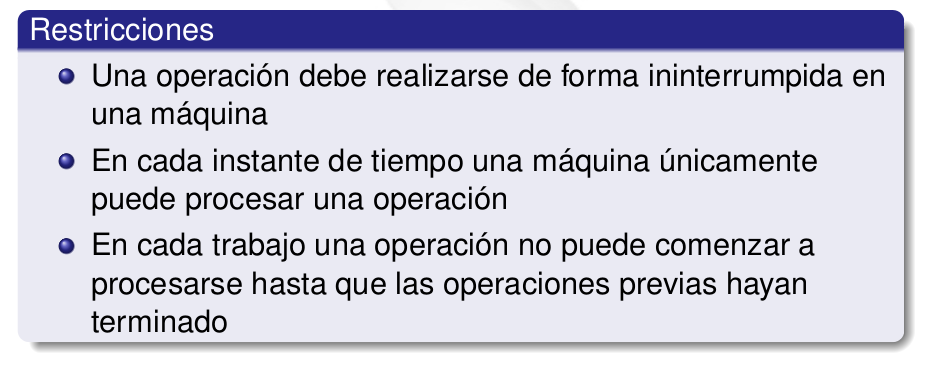

In [20]:
# Cargamos una imagen que describe un conjunto de restricciones que debe 
# satisfacer un tipo de problema dado
 
i = Image(filename='images/ProblemaTip.png')
i

In [21]:
# Identifique con cuál de los siguientes problemas se corresponden las características descritas anteriormente

# 1) Problema del agente viajero (TSP)
# 2) Problema de la sincronización de máquinas
# 3) Problema de la mochila 
# 4) Problema de la planificación (scheduling)
# 5) Problema de la ruta de vehículos (vehicle routing problem)
# 6) Problema NP completo

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta

%run TipoDeProblemas.py 4

El valor escogido es correcto.


In [22]:
# A continuación leemos una instancia del problema de la planificación (scheduling)
# con un número de trabajos n_jobs=10 y de máquinas n_machines=10

def Read_Scheduling_Instance(fname):   
 hdl = open(fname, 'r')
 mylist = hdl.readlines()
 hdl.close()
 n_jobs = eval(mylist[1].split()[0])
 n_machines = eval(mylist[1].split()[1])

 processingtimes = np.zeros((n_jobs,n_machines))    
    
 for i in range(n_jobs):
   for j,val in enumerate(mylist[i+3].split()):   
       processingtimes[i,j] = eval(val)         
            
 return n_jobs,n_machines,processingtimes
        
n_jobs,n_machines,processingtimes = Read_Scheduling_Instance('../Instances/PFSP/Cebe.pfsp.n10.m10.1')         
print(n_jobs,n_machines,processingtimes)

10 10 [[68. 12. 16. 76. 22. 88. 95. 60. 50. 31.]
 [41. 48. 41. 83. 83. 59. 66. 55. 93.  8.]
 [40. 45. 61. 27. 86. 93. 96. 14. 98. 81.]
 [ 7. 15. 14.  9. 29. 60. 54. 29. 81.  8.]
 [88. 20. 18. 94. 99. 21. 92. 12. 41. 19.]
 [98. 48. 86. 79. 93. 65.  4. 48. 67. 35.]
 [31. 17. 52. 59. 94. 40. 14. 46. 14. 25.]
 [27. 92. 73. 40. 18. 18. 38.  5. 82. 88.]
 [ 8. 63. 58. 46. 26. 25. 18. 94. 46. 82.]
 [ 5. 99. 60. 71. 28. 46. 91. 39. 49. 99.]]


In [23]:
# La función Eval_Scheduling_instance calcula el tiempo total de terminación de los
# trabajos para el problema de planificación

def Eval_Scheduling_instance(processingtimes,solution):
 n_jobs = processingtimes.shape[0]         # Número de trabajos
 n_machines = processingtimes.shape[1]          # Número de maquinas 
 timeTable = np.zeros((1,n_machines));
 prev_machine=0;
 first_pos =solution[0];
 j = range(n_machines)
 timeTable = np.cumsum(processingtimes[j,first_pos]);

 # Calcula el tiempo total de terminación de los trabajos
 fval = timeTable[n_machines-1];
 for z in range(1,n_jobs):
    job = solution[z]-1    
    timeTable[0] = timeTable[0] + processingtimes[0,job]
    prev_machine = timeTable[0]
    for machine in range(1,n_machines):
        timeTable[machine] = np.max([prev_machine,timeTable[machine]])+ processingtimes[machine,job]
        prev_machine = timeTable[machine]
    fval = fval + timeTable[machine-1]	
 return fval

my_sol = [1,2,3,4,5,6,7,8,9,10]
fval = Eval_Scheduling_instance(processingtimes,my_sol) 
print(fval)

7537.0


In [24]:
# Cuáles de las siguientes características pueden considerarse como ventajas de los algoritmos
# heurísticos frente a los clásicos

# 1) Son aplicables de manera general
# 2) Experimentalmente muy probados
# 3) Muy desarrollados y estudiados matemáticamente
# 4) Fáciles de implementar y entender
# 5) Tiempos de cómputo razonables
# 6) Cuando convergen alcanzan siempre la solución óptima

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta

%run VentajasHeuristicos.py 1 4 5


Todas las respuestas escogidas son correctas y no falta ninguna.


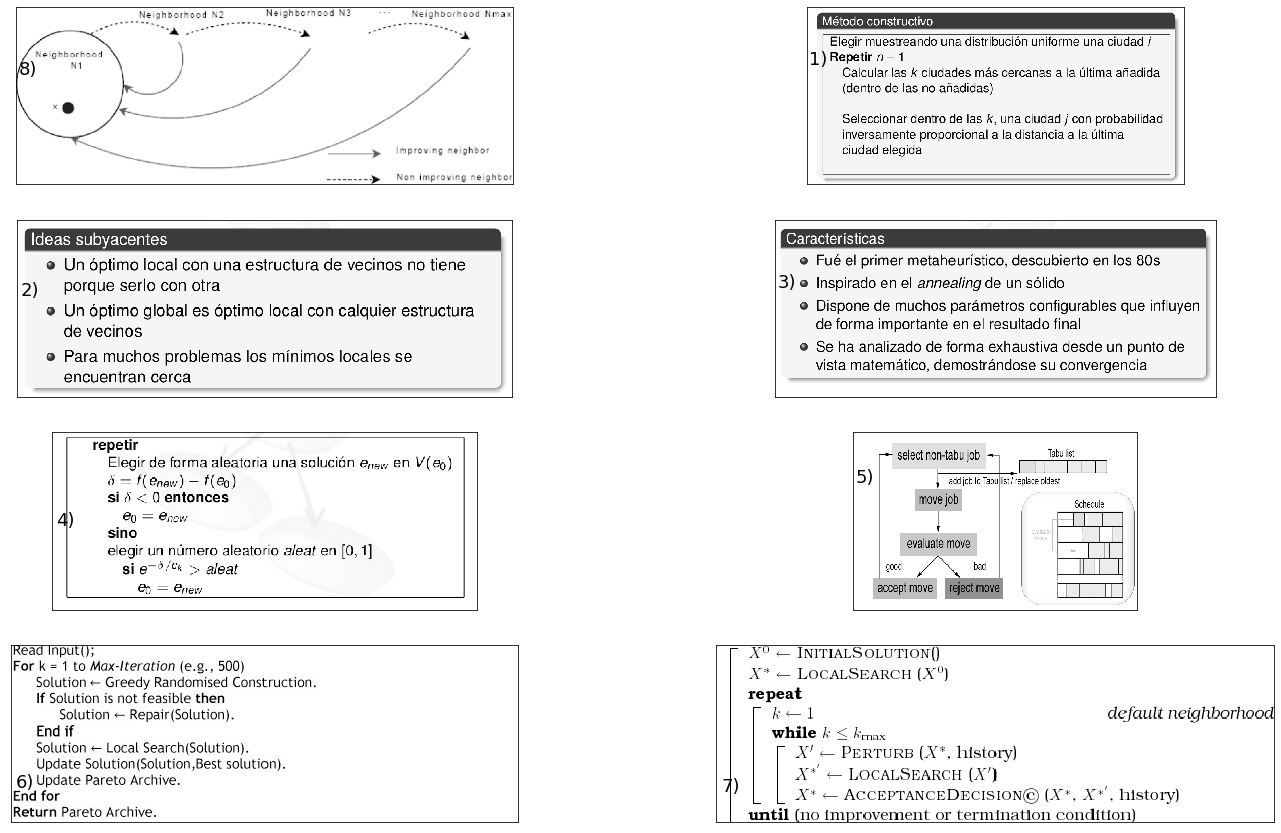

In [25]:
# Importamos varias imágenes representando diferentes conceptos relacionados con extensiones
# de la búsqueda local

matplotlib.rcParams['figure.figsize'] = (24,15)
f = pl.figure()
for n, fname in enumerate(('images/LS_ext1.png', 'images/LS_ext2.png','images/LS_ext3.png','images/LS_ext4.png','images/LS_ext5.png','images/LS_ext6.png','images/LS_ext7.png','images/LS_ext8.png')):
    image=im.open(fname).convert("L")    
    arr=np.asarray(image)
    f.add_subplot(4, 2, n+1)  # this line outputs images side-by-side    
    fig=pl.imshow(arr,cmap=cm.Greys_r)
    ttitle = str(np.mod(n+7,8)+1)+')'
    pl.text(5,142,ttitle,size=18)    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False) 
    

In [26]:
# Identifique cuáles de las imágenes anteriores están relacionadas con los siguientes
# métodos

# Relacionadas con el algoritmo GRASP
%run RelacionadasGRASP.py 1 6                   
# Relacionadas con el algoritmo de enfriamiento simulado
%run RelacionadasEnfriamientoSimulado.py 3 4 
# Relacionadas con la búsqueda de vecindad variable (VNS)
%run RelacionadasVNS.py  2 8


Todas las respuestas escogidas son correctas y no falta ninguna.
Todas las respuestas escogidas son correctas y no falta ninguna.
Todas las respuestas escogidas son correctas y no falta ninguna.


<Figure size 1728x1080 with 0 Axes>

In [27]:
# La función GRASP_TwoOpt implementa el método GRASP para el problema del agente-viajero
# utilizando como optimizador local la función Apply_Local_Search_TwoOpt
# Estudie el script observando la diferencia entre los pasos de construcción de la
# solución inicial y el de la aplicación del optimizador local


def Apply_Local_Search_TwoOpt(Dist_Matrix,init_sol):    
 n = Dist_Matrix.shape[1]   
 best_val = Eval_TSP_instance(Dist_Matrix,init_sol)              # Mejor valor
 best_sol = init_sol                                             # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = TwoOpt(best_sol)            # Todos los vecinos
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_TSP_instance(Dist_Matrix,sol)    # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol+1, number_evaluations)  
 return best_val, best_sol, number_evaluations   

    
    
# Procedimiento GRASP para el problema del agente viajero utilizando 2-opt
# Primeramente se construye una solución utilizando un método constructivo
# Luego se aplica un algoritmo de búsqueda local
def GRASP_TwoOpt(Dist_Matrix):    
 n = Dist_Matrix.shape[1] 
 max_dist = np.max(np.max(Dist_Matrix))   # Máxima distancia en la matrix de distancias   
 sol = np.zeros(n,dtype=int)                        # La solución que se construirá      
 cities_to_add = set(range(n))            # Conjunto de ciudades que se adicionarán      
 first_city = np.random.randint(n,size=1)[0]  # La primera ciudad se elige aleatoriamente
 sol[0] = first_city                  
 cities_to_add.remove(first_city)         # Se actualizan los conjuntos de ciudades elegidas y por elegir
 cities_added = set([first_city])   
 last_city = first_city                   # última ciudad añadida hasta el momento
   
 while len(cities_to_add)>0:              # Mientras queden ciudades por añadir
   candidates = np.zeros(len(cities_to_add),dtype=int)         # Se crea una lista de candidatas     
   vect_distances = np.zeros(len(cities_to_add))     # Se crea un vector de probabilidades para cada candidata                                                      
   for i, member in enumerate(cities_to_add):      
     vect_distances[i] = (max_dist-Dist_Matrix[last_city,member]) # Las probabilidades son inv. prop. a las distancias
     candidates[i] = member          
   vect_distances = ((vect_distances)/np.sum(vect_distances))  # se normaliza el vector de probabilidades        
   last_city = np.random.choice(candidates,size=1,replace=True,p=vect_distances)[0]  # Se actualiza última ciudad
   sol[len(cities_added)] = last_city                         # Se actualiza la solución y los conjuntos de ciudades
   cities_added.add(last_city)
   cities_to_add.remove(last_city)  # FINAL DEL PROCESO CONSTRUCTIVO
            
 # SE LLAMA AL OPTIMIZADOR LOCAL           
 best_val, best_sol, number_evaluations = Apply_Local_Search_TwoOpt(Dist_Matrix,sol)            
 return best_val, best_sol, number_evaluations+1   
        
best_val, best_sol, number_evaluations = GRASP_TwoOpt(TSP_Matrix)
print('Final solution: ',best_val,best_sol, number_evaluations)  
  
    
    


[ 6  5 -1  4  3  0  8  2  7  1]
[-1  5  6  4  3  0  8  2  7  1]
[ 4 -1  5  6  3  0  8  2  7  1]
[ 3  4 -1  5  6  0  8  2  7  1]
[ 0  3  4 -1  5  6  8  2  7  1]
[ 8  0  3  4 -1  5  6  2  7  1]
[ 2  8  0  3  4 -1  5  6  7  1]
[ 7  2  8  0  3  4 -1  5  6  1]
[ 6  4 -1  5  3  0  8  2  7  1]
[ 6  3  4 -1  5  0  8  2  7  1]
[ 6  0  3  4 -1  5  8  2  7  1]
[ 6  8  0  3  4 -1  5  2  7  1]
[ 6  2  8  0  3  4 -1  5  7  1]
[ 6  7  2  8  0  3  4 -1  5  1]
[ 6  1  7  2  8  0  3  4 -1  5]
[ 6  5  3  4 -1  0  8  2  7  1]
[ 6  5  0  3  4 -1  8  2  7  1]
[ 6  5  8  0  3  4 -1  2  7  1]
[ 6  5  2  8  0  3  4 -1  7  1]
[ 6  5  7  2  8  0  3  4 -1  1]
[ 6  5  1  7  2  8  0  3  4 -1]
[ 6  5 -1  0  3  4  8  2  7  1]
[ 6  5 -1  8  0  3  4  2  7  1]
[ 6  5 -1  2  8  0  3  4  7  1]
[ 6  5 -1  7  2  8  0  3  4  1]
[ 6  5 -1  1  7  2  8  0  3  4]
[ 6  5 -1  4  8  0  3  2  7  1]
[ 6  5 -1  4  2  8  0  3  7  1]
[ 6  5 -1  4  7  2  8  0  3  1]
[ 6  5 -1  4  1  7  2  8  0  3]
[ 6  5 -1  4  3  2  8  0  7  1]
[ 6  5 -

In [28]:
# A partir del ejemplo anterior y de la función Local_Search_Swap_PFSP, cree la 
# función Apply_Local_Search_Swap_PFSP y modifique la función GRASP_Swap_PFSP(Dist_Matrix):    
# para que implemente una búsqueda GRASP para el problema de la planificación (PFSP)
# Sugerencia: Utilice los tiempos  de procesamiento de cada trabajo para determinar
# las probabilidades en el momento de construir la solución inicial

def GRASP_Swap_PFSP(Dist_Matrix):    
 n = Dist_Matrix.shape[1] 
 max_dist = np.max(np.max(Dist_Matrix))   # Máxima distancia en la matrix de distancias   
 sol = np.zeros(n, dtype=int)                        # La solución que se construirá
 cities_to_add = set(range(n))            # Conjunto de ciudades que se adicionarán      
 first_city = np.random.randint(n,size=1)[0]  # La primera ciudad se elige aleatoriamente
 sol[0] = first_city                  
 cities_to_add.remove(first_city)         # Se actualizan los conjuntos de ciudades elegidas y por elegir
 cities_added = set([first_city])   
 last_city = first_city                   # última ciudad añadida hasta el momento
   
 while len(cities_to_add)>0:              # Mientras queden ciudades por añadir
   candidates = np.zeros(len(cities_to_add), dtype=int)         # Se crea una lista de candidatas 
   vect_distances = np.zeros(len(cities_to_add))     # Se crea un vector de probabilidades para cada candidata                                                      
   for i, member in enumerate(cities_to_add):      
     vect_distances[i] = (max_dist-Dist_Matrix[last_city,member]) # Las probabilidades son inv. prop. a las distancias
     candidates[i] = member          
   vect_distances = ((vect_distances)/np.sum(vect_distances))  # se normaliza el vector de probabilidades        
   last_city = np.random.choice(candidates,size=1,replace=True,p=vect_distances)[0]  # Se actualiza última ciudad
   sol[len(cities_added)] = last_city                         # Se actualiza la solución y los conjuntos de ciudades
   cities_added.add(last_city)
   cities_to_add.remove(last_city)  # FINAL DEL PROCESO CONSTRUCTIVO
            
 # SE LLAMA AL OPTIMIZADOR LOCAL           
 best_val, best_sol, number_evaluations = Apply_Local_Search_TwoOpt(Dist_Matrix,sol)            
 return best_val, best_sol+1, number_evaluations+1   
        
best_val, best_sol, number_evaluations = GRASP_Swap_PFSP(TSP_Matrix) # Modificar para utilizar parámetros de la función
print('Final solution: ',best_val,best_sol, number_evaluations)  
  
    

[ 5  2  0  8  1  7  3  6  4 -1]
[ 0  2  5  8  1  7  3  6  4 -1]
[ 8  0  2  5  1  7  3  6  4 -1]
[ 1  8  0  2  5  7  3  6  4 -1]
[ 7  1  8  0  2  5  3  6  4 -1]
[ 3  7  1  8  0  2  5  6  4 -1]
[ 6  3  7  1  8  0  2  5  4 -1]
[ 4  6  3  7  1  8  0  2  5 -1]
[ 5  8  0  2  1  7  3  6  4 -1]
[ 5  1  8  0  2  7  3  6  4 -1]
[ 5  7  1  8  0  2  3  6  4 -1]
[ 5  3  7  1  8  0  2  6  4 -1]
[ 5  6  3  7  1  8  0  2  4 -1]
[ 5  4  6  3  7  1  8  0  2 -1]
[ 5 -1  4  6  3  7  1  8  0  2]
[ 5  2  1  8  0  7  3  6  4 -1]
[ 5  2  7  1  8  0  3  6  4 -1]
[ 5  2  3  7  1  8  0  6  4 -1]
[ 5  2  6  3  7  1  8  0  4 -1]
[ 5  2  4  6  3  7  1  8  0 -1]
[ 5  2 -1  4  6  3  7  1  8  0]
[ 5  2  0  7  1  8  3  6  4 -1]
[ 5  2  0  3  7  1  8  6  4 -1]
[ 5  2  0  6  3  7  1  8  4 -1]
[ 5  2  0  4  6  3  7  1  8 -1]
[ 5  2  0 -1  4  6  3  7  1  8]
[ 5  2  0  8  3  7  1  6  4 -1]
[ 5  2  0  8  6  3  7  1  4 -1]
[ 5  2  0  8  4  6  3  7  1 -1]
[ 5  2  0  8 -1  4  6  3  7  1]
[ 5  2  0  8  1  6  3  7  4 -1]
[ 5  2  

In [29]:
# A partir del ejemplo anterior y de la función Local_Search_Swap_PFSP, cree la 
# función Apply_Local_Search_Swap_PFSP y modifique la función GRASP_Swap_PFSP(Dist_Matrix):    
# para que implemente una búsqueda GRASP para el problema de la planificación (PFSP)
# Sugerencia: Utilice los tiempos  de procesamiento de cada trabajo para determinar
# las probabilidades en el momento de construir la solución inicial

def Apply_Local_Search_Swap_PFSP(processingtimes,sol):    
 n = processingtimes.shape[0]  
 init_sol = sol
 best_val = Eval_Scheduling_instance(processingtimes,init_sol-1)   # Mejor valor
 best_sol = init_sol                                             # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = Swap(best_sol)            # Todos los vecinos
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_Scheduling_instance(processingtimes,sol-1)   # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)      
 return best_val, best_sol, number_evaluations   

def GRASP_Swap_PFSP(processingtimes):    
 n = processingtimes.shape[1] 
 max_time = np.max(np.max(processingtimes))   # Máximo tiempo de processamiento   
 sol = np.zeros(n, dtype=int)                        # La solución que se construirá
 jobs_to_add = set(range(n))            # Conjunto de jobs que se adicionarán      
 first_job = np.random.randint(n,size=1)[0]  # El primer job se elige aleatoriamente
 sol[0] = first_job                  
 jobs_to_add.remove(first_job)         # Se actualizan los conjuntos de jobs elegidas y por elegir
 jobs_added = set([first_job])   
 last_job = first_job                   # último jon añadida hasta el momento
   
 while len(jobs_to_add)>0:              # Mientras queden ciudades por añadir
   candidates = np.zeros(len(jobs_to_add), dtype=int)         # Se crea una lista de candidatas 
   vect_distances = np.zeros(len(jobs_to_add))     # Se crea un vector de probabilidades para cada candidata                                                      
   for i, member in enumerate(jobs_to_add):      
     vect_distances[i] = (max_time-processingtimes[last_job,member]) # Las probabilidades son inv. prop. a las distancias
     candidates[i] = member          
   vect_distances = ((vect_distances)/np.sum(vect_distances))  # se normaliza el vector de probabilidades        
   last_job = np.random.choice(candidates,size=1,replace=True,p=vect_distances)[0]  # Se actualiza último job
   sol[len(jobs_added)] = last_job                         # Se actualiza la solución y los conjuntos de jobs
   jobs_added.add(last_job)
   jobs_to_add.remove(last_job)  # FINAL DEL PROCESO CONSTRUCTIVO
            
 # SE LLAMA AL OPTIMIZADOR LOCAL           
 best_val, best_sol, number_evaluations = Apply_Local_Search_Swap_PFSP(processingtimes,sol)            
 return best_val, best_sol+1, number_evaluations+1   
        
best_val, best_sol, number_evaluations = GRASP_Swap_PFSP(processingtimes) # Modificar para utilizar parámetros de la función
print('Final solution: ',best_val,best_sol, number_evaluations)  
  
    

8459.0 [3 0 4 9 6 8 1 2 7 5] 10
7379.0 [0 3 4 9 6 8 1 2 7 5] 19
Final solution:  7379.0 [ 1  4  5 10  7  9  2  3  8  6] 29


In [30]:
# A continuación utilizamos las estructuras de vecinos definidas anteriormente para el problema TSP
# TwoOpt, Swap, y Decrease para implementar una búsqueda de vecindad variable
# Ejecute el script y evalúe la influencia de cambiar el tipo de estructura de vecinos
# utilizado en cada nivel


def VNS_TSP(Dist_Matrix,init_sol):    
 n = Dist_Matrix.shape[1]   
 best_val = Eval_TSP_instance(Dist_Matrix,init_sol)              # Mejor valor
 best_sol = init_sol                                             # Mejor solución   
 number_evaluations = 1   
 neighborhood_level = 0           # Se asocia una estructura de vecinos diferente a 
 while neighborhood_level<3:       # cada nivel
   improvement = True     
   while improvement:               # Mientras se mejore el valor de la función                                   
    if neighborhood_level==0:        # De acuerdo al nivel se utiliza una estructura 
      neighbors = TwoOpt(best_sol)   # de vecinos u otra     
    elif neighborhood_level==1:
      neighbors = Swap(best_sol)        
    elif neighborhood_level==2:
      neighbors = Decrease(best_sol)  
    print(neighborhood_level)
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_TSP_instance(Dist_Matrix,sol)    # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(neighborhood_level,best_val,best_sol, number_evaluations)  
      neighborhood_level = 0                        # Si se mejora la solución se vuelve al nivel cero
    else:
      neighborhood_level = neighborhood_level + 1  
 return best_val, best_sol+1, number_evaluations   

n = TSP_Matrix.shape[0]    
init_sol = np.random.permutation(n)+1
best_val, best_sol, number_evaluations = VNS_TSP(TSP_Matrix,init_sol)
print('Final solution: ',best_val,best_sol, number_evaluations) 

[2 7 8 5 1 4 3 9 6 0]
0
[8 7 2 5 1 4 3 9 6 0]
[5 8 7 2 1 4 3 9 6 0]
[1 5 8 7 2 4 3 9 6 0]
[4 1 5 8 7 2 3 9 6 0]
[3 4 1 5 8 7 2 9 6 0]
[9 3 4 1 5 8 7 2 6 0]
[6 9 3 4 1 5 8 7 2 0]
[2 5 8 7 1 4 3 9 6 0]
[2 1 5 8 7 4 3 9 6 0]
[2 4 1 5 8 7 3 9 6 0]
[2 3 4 1 5 8 7 9 6 0]
[2 9 3 4 1 5 8 7 6 0]
[2 6 9 3 4 1 5 8 7 0]
[2 0 6 9 3 4 1 5 8 7]
[2 7 1 5 8 4 3 9 6 0]
[2 7 4 1 5 8 3 9 6 0]
[2 7 3 4 1 5 8 9 6 0]
[2 7 9 3 4 1 5 8 6 0]
[2 7 6 9 3 4 1 5 8 0]
[2 7 0 6 9 3 4 1 5 8]
[2 7 8 4 1 5 3 9 6 0]
[2 7 8 3 4 1 5 9 6 0]
[2 7 8 9 3 4 1 5 6 0]
[2 7 8 6 9 3 4 1 5 0]
[2 7 8 0 6 9 3 4 1 5]
[2 7 8 5 3 4 1 9 6 0]
[2 7 8 5 9 3 4 1 6 0]
[2 7 8 5 6 9 3 4 1 0]
[2 7 8 5 0 6 9 3 4 1]
[2 7 8 5 1 9 3 4 6 0]
[2 7 8 5 1 6 9 3 4 0]
[2 7 8 5 1 0 6 9 3 4]
[2 7 8 5 1 4 6 9 3 0]
[2 7 8 5 1 4 0 6 9 3]
[2 7 8 5 1 4 3 0 6 9]
0 273.0 [ 3  8  5  2  6  9  4 10  7  1] 36
0
[4 7 2 1 5 8 3 9 6 0]
[1 4 7 2 5 8 3 9 6 0]
[5 1 4 7 2 8 3 9 6 0]
[8 5 1 4 7 2 3 9 6 0]
[3 8 5 1 4 7 2 9 6 0]
[9 3 8 5 1 4 7 2 6 0]
[6 9 3 8 5 1 4 7 2 0]
[2 1 4 

In [31]:
# A partir del ejemplo anterior, modifique el programa VNS_PFSP
# para optimizar el problema de la planificación de tareas


def VNS_PFSP(processingtimes,init_sol):    
 n = processingtimes.shape[1]   
 best_val =  Eval_Scheduling_instance(processingtimes,init_sol-1)    # Mejor valor
 best_sol = init_sol                                             # Mejor solución   
 number_evaluations = 1   
 neighborhood_level = 0           # Se asocia una estructura de vecinos diferente a 
 while neighborhood_level<3:       # cada nivel
   improvement = True     
   while improvement:               # Mientras se mejore el valor de la función                                   
    if neighborhood_level==0:        # De acuerdo al nivel se utiliza una estructura 
      neighbors = TwoOpt(best_sol)   # de vecinos u otra     
    elif neighborhood_level==1:
      neighbors = Swap(best_sol)        
    elif neighborhood_level==2:
      neighbors = Decrease(best_sol)  
    print(neighborhood_level)
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      fval =  Eval_Scheduling_instance(processingtimes,sol-1)   # Se evalua la función
      if fval<best_val_among_neighbors:             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval             # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(neighborhood_level,best_val,best_sol, number_evaluations)  
      neighborhood_level = 0                        # Si se mejora la solución se vuelve al nivel cero
    else:
      neighborhood_level = neighborhood_level + 1  
 return best_val, best_sol, number_evaluations   

n = TSP_Matrix.shape[0]    
init_sol = np.random.permutation(n)+1
best_val, best_sol, number_evaluations = VNS_PFSP(processingtimes,init_sol)
print('Final solution: ',best_val,best_sol, number_evaluations) 

0
0 7879.0 [ 3  2  9  4 10  8  1  5  6  7] 36
0
0 7345.0 [10  4  9  2  3  8  1  5  6  7] 71
0
0 7309.0 [10  4  9  2  3  5  1  8  6  7] 106
0
0 7239.0 [10  4  9  2  3  5  1  7  6  8] 141
0
0 7167.0 [10  4  9  2  3  7  1  5  6  8] 176
0
1
2
Final solution:  7167.0 [10  4  9  2  3  7  1  5  6  8] 229
